In [6]:
#pip install pywinter 

In [14]:
import pywinter.winter as pyw
import xarray as xr
import xesmf as xe


    print(interfile.keys())
    print(interfile['TT'].general)
    print(interfile['TT'].geoinfo)
    #print(interfile['TT'].val)
    print(interfile['TT'].val.shape)


In [ ]:
wrf_interfile  ='control/ERA5A:2023-01-01_00'
ssp = 'ssp585'
prd = '2040-2059_2000-2019'
idir0 = '../01_Generate_Global_Warming_Increment/diff/diff/'

In [15]:


interfile = pyw.rinter(wrf_interfile) 
x = interfile['TT']
slat, slon = x.geoinfo['STARTLAT'], x.geoinfo['STARTLON']
dlat, dlon = x.geoinfo['DELTALAT'], x.geoinfo['DELTALON']
shape = x.val.shape
lev = x.level
lat = [ slat + i*dlat for i in range(shape[-2]) ]
lon = [ slon + i*dlon for i in range(shape[-1]) ]



In [16]:
target_grid = xr.Dataset({
    'lat': (['lat'], lat),
    'lon': (['lon'], lon), 
})
new_levels = xr.DataArray(lev, dims="plev", name="plev")  

In [23]:

idir = idir0 + '/'+ssp + '/'+prd + '/'

In [24]:
var_info = { 'RH': 'hur', 'TT':'ta', 'UU':'ua', 'VV':'va', 'GHT':'zg', 'SKINTEMP':'ts', 'SST':'ts' }

In [21]:
do = xr.Dataset()
for k, v in var_info.items():
    print(k, v)
    f = idir + '/'+v+'/'+v+'_'+g+'.nc'
    ds = xr.open_dataset(f)[v]   
    
    regridder = xe.Regridder(ds, target_grid, method='bilinear')
    regridded_data = regridder(ds)
    if not v in ['ts']: regridded_data = regridded_data.interp(plev=new_levels)    

    do[k] = regridded_data


RH hur
TT ta
UU ua
VV va
GHT zg
SKINTEMP ts
SST ts


In [29]:
odir = 'output'
ofile = odir + '/'+ ssp + '.' + prd + '.' + g + '.nc'
print(ofile)
do.to_netcdf(ofile)

output/ssp585.2040-2059_2000-2019.EC-Earth3.nc


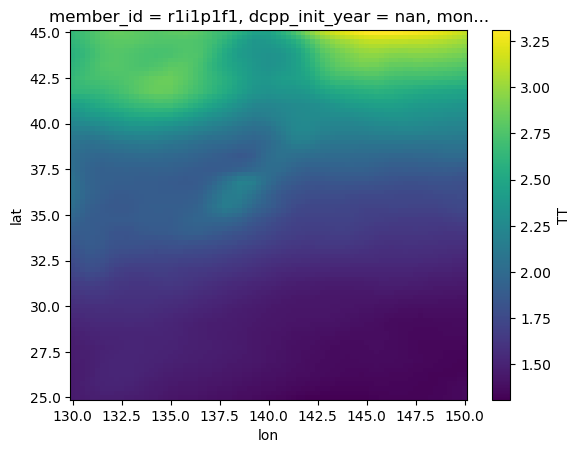

In [30]:
do.TT[0,2].plot()